In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read data
d_data = pd.read_csv('C:/Users/RAAVAN/Downloads/Python/diabetes.csv')

The datasets consists of several medical predictor variables and one target variable, Outcome. Columns are following :-
1. Pregnancies :- Number of times pregnant
2. Glucose:- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure:- Diastolic blood pressure (mm Hg)
4. SkinThickness:- Triceps skin fold thickness (mm)
5. Insulin:- 2-Hour serum insulin (mu U/ml)
6. BMI:- Body mass index (weight in kg/(height in m)²)
7. DiabetesPedigreeFunction:- Diabetes pedigree function
8. Age:-Age in years
9. Outcome:- Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [3]:
#Top 10 data
d_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
#shape of the data
d_data.shape

(768, 9)

In [6]:
#information of data, data types, no of rows & columns
d_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#Basic Statistics
d_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From above output, It is strange that some column min value zero-like 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'. Which is not possible anyway. In those columns, zero may represent missing values. 
Whhereas 'Pregnancies' min value is zero which is logical[patients may never be pregnent before]. 
And 'Outcome' min value is zero which represent 'not a diabetic patients'.

In [12]:
#replace zero with NAN
d_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = d_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

In [13]:
d_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [14]:
#checking the total no of null values after replacing zero with NAN(on specific column)
d_data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [18]:
d_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
#variance od data set
d_data.var()

Pregnancies                    11.354056
Glucose                       932.425376
BloodPressure                 153.317842
SkinThickness                 109.767160
Insulin                     14107.703775
BMI                            47.955463
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

There is high variance present in Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, Age.
But we can't drop it because those column has significant effect on outcome(whether patients has diabetics or not).

In [20]:
#Replace missing value(NAN) to median value to explore dataset

d_data['Glucose'].fillna(d_data['Glucose'].median(),inplace=True)
d_data['BloodPressure'].fillna(d_data['BloodPressure'].median(),inplace=True)
d_data['SkinThickness'].fillna(d_data['SkinThickness'].median(),inplace=True)
d_data['Insulin'].fillna(d_data['Insulin'].median(),inplace=True)
d_data['BMI'].fillna(d_data['BMI'].median(),inplace=True)
d_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [21]:
d_data.var()

Pregnancies                   11.354056
Glucose                      926.489244
BloodPressure                146.328741
SkinThickness                 77.285567
Insulin                     7462.033002
BMI                           47.268056
DiabetesPedigreeFunction       0.109779
Age                          138.303046
Outcome                        0.227483
dtype: float64

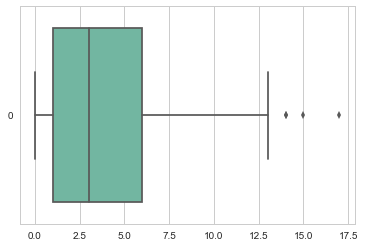

In [54]:
#Outliers Observation
sns.set(style="whitegrid")
sns.boxplot(data=d_data['Pregnancies'], 
            orient="h", palette="Set2")

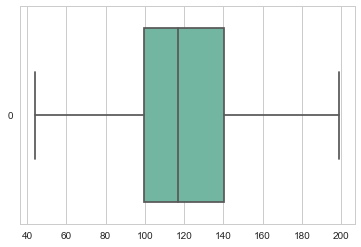

In [47]:
sns.boxplot(data=d_data['Glucose'], 
            orient="h", palette="Set2")

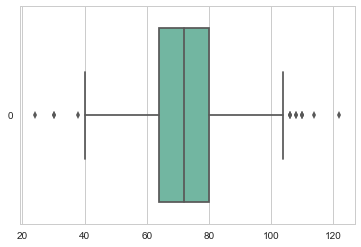

In [48]:

sns.boxplot(data=d_data['BloodPressure'], 
            orient="h", palette="Set2")

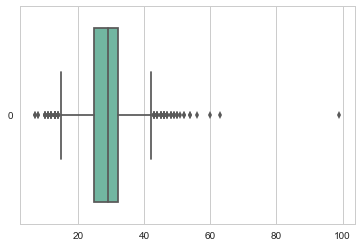

In [49]:
sns.boxplot(data=d_data['SkinThickness'], 
            orient="h", palette="Set2")

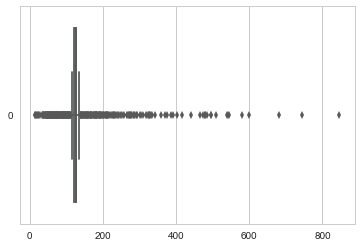

In [50]:
sns.boxplot(data=d_data['Insulin'], 
            orient="h", palette="Set2")


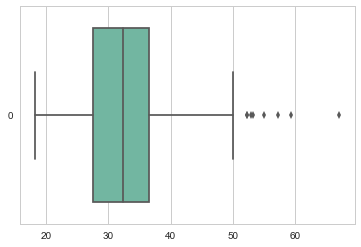

In [51]:
sns.boxplot(data=d_data['BMI'], 
            orient="h", palette="Set2")


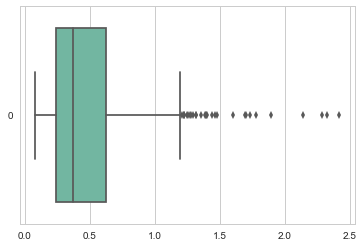

In [52]:
sns.boxplot(data=d_data['DiabetesPedigreeFunction'], 
            orient="h", palette="Set2")

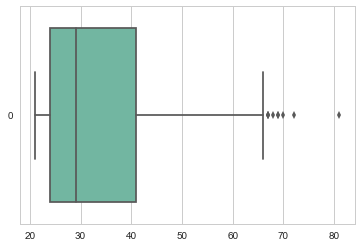

In [53]:
sns.boxplot(data=d_data['Age'], 
            orient="h", palette="Set2")

There is significant outlier present in      
BloodPressure        
SkinThickness       
Insulin               
BMI                     
DiabetesPedigreeFunction  

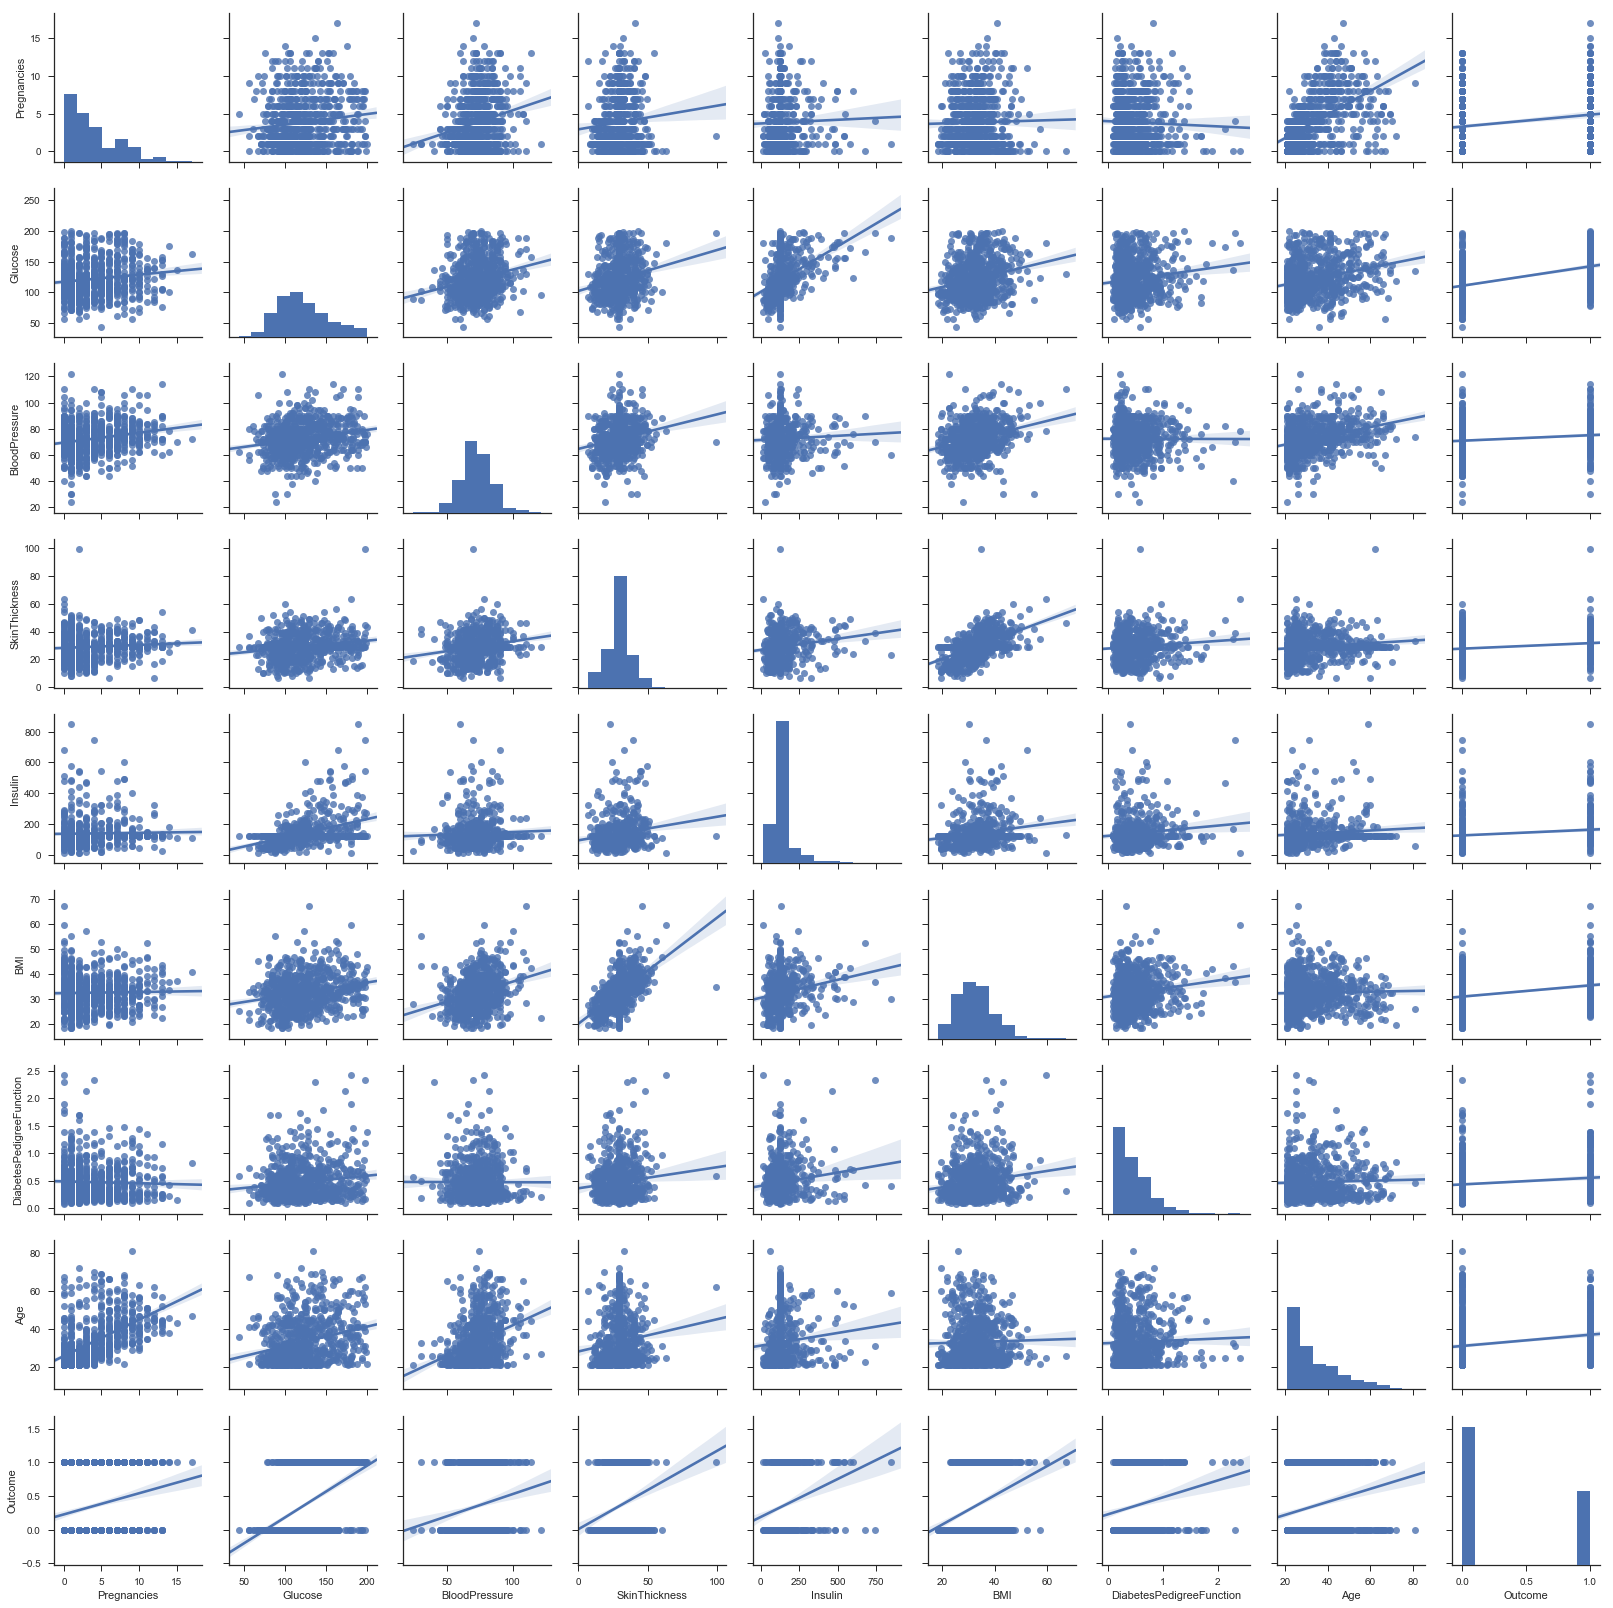

In [71]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(d_data, kind="reg", palette="husl")

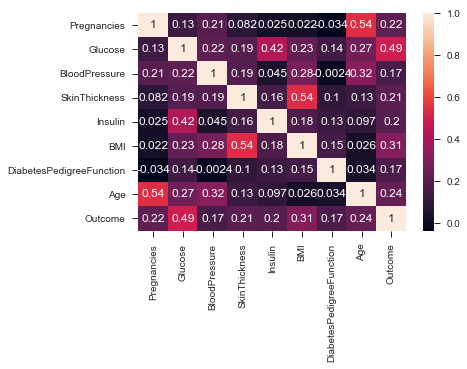

In [68]:
sns.heatmap(d_data.corr(),annot=True)

Glucose and Outcome positively correllated.
SkinThickness and BMI positively correllated.
A moderate correlation (0.54) is observed between Pregnancies and Age.

C:\Users\RAAVAN\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


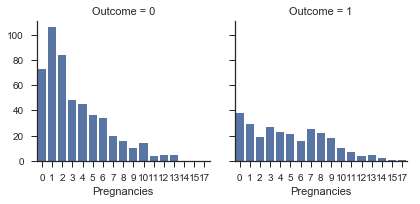

In [79]:
#Pregnancies and Outcome
g = sns.FacetGrid(d_data,col="Outcome")
g.map(sns.countplot, "Pregnancies")

‘1’ is the no of people with diabetes in this data set and ‘0’ is actually the number of normal people in the specific outcome, with no diabetes. Above plot shows that number of pregnancies count is high where there is no diabetes and pregnancies count reduce where there is diabetes, however the dataset is still very small to draw any concrete conclusion.

C:\Users\RAAVAN\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1152x720 with 0 Axes>

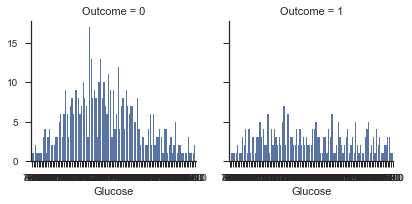

In [103]:
#Glucose and Outcome
plt.figure(figsize=(16, 10))
g = sns.FacetGrid(d_data,col="Outcome")
g.map(sns.countplot, "Glucose")

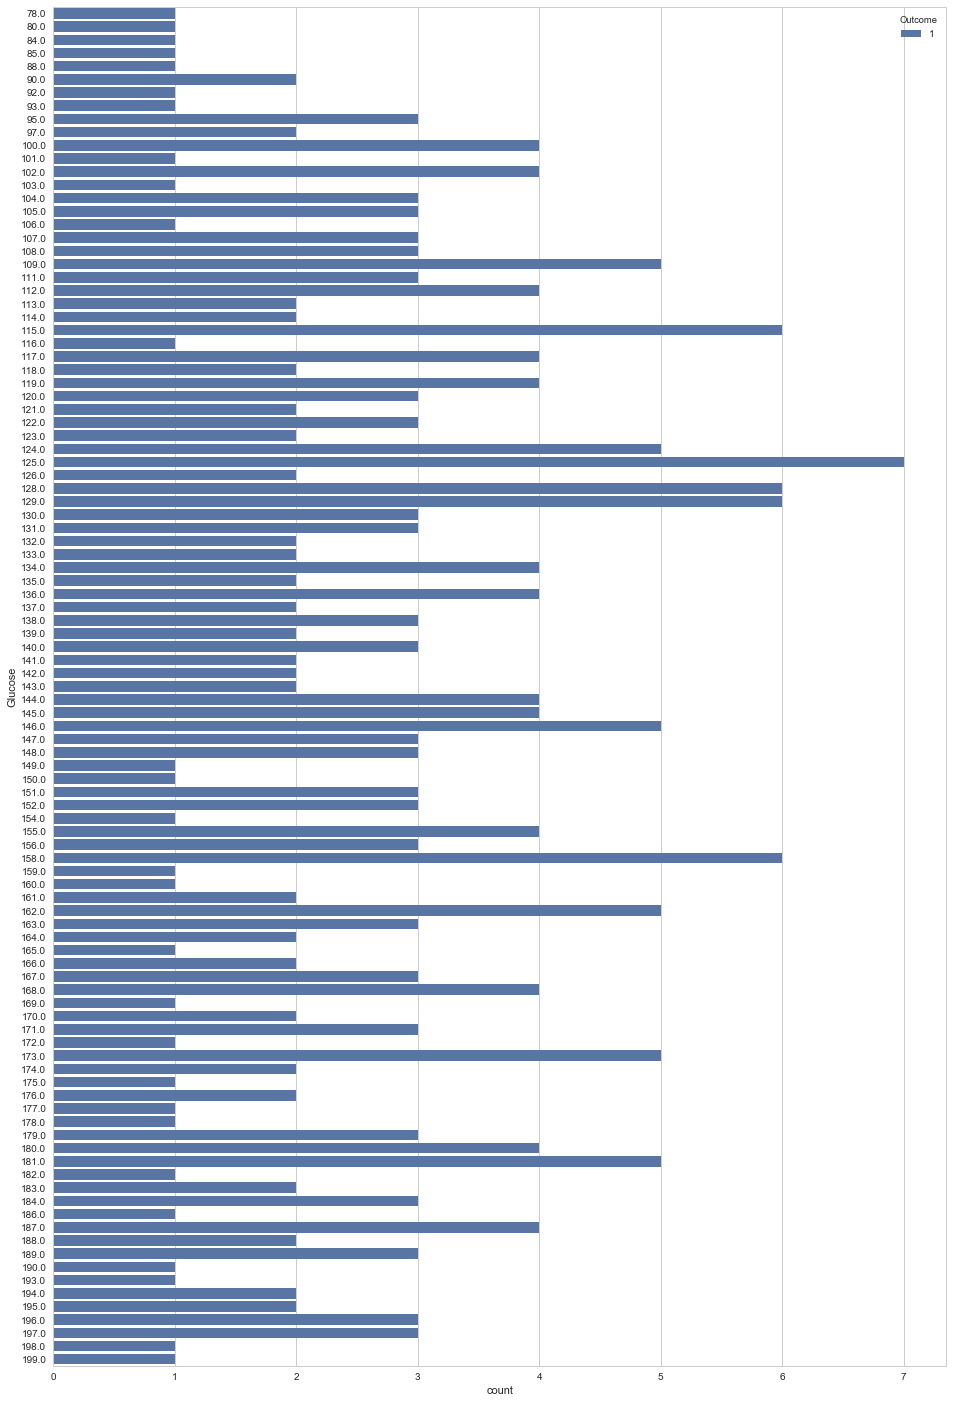

In [107]:
#Count of people with diabetics (1)
plt.figure(figsize=(16, 25))
sns.set(style="whitegrid")
sns.countplot(y='Glucose', hue='Outcome',data=d_data[d_data['Outcome']==1])

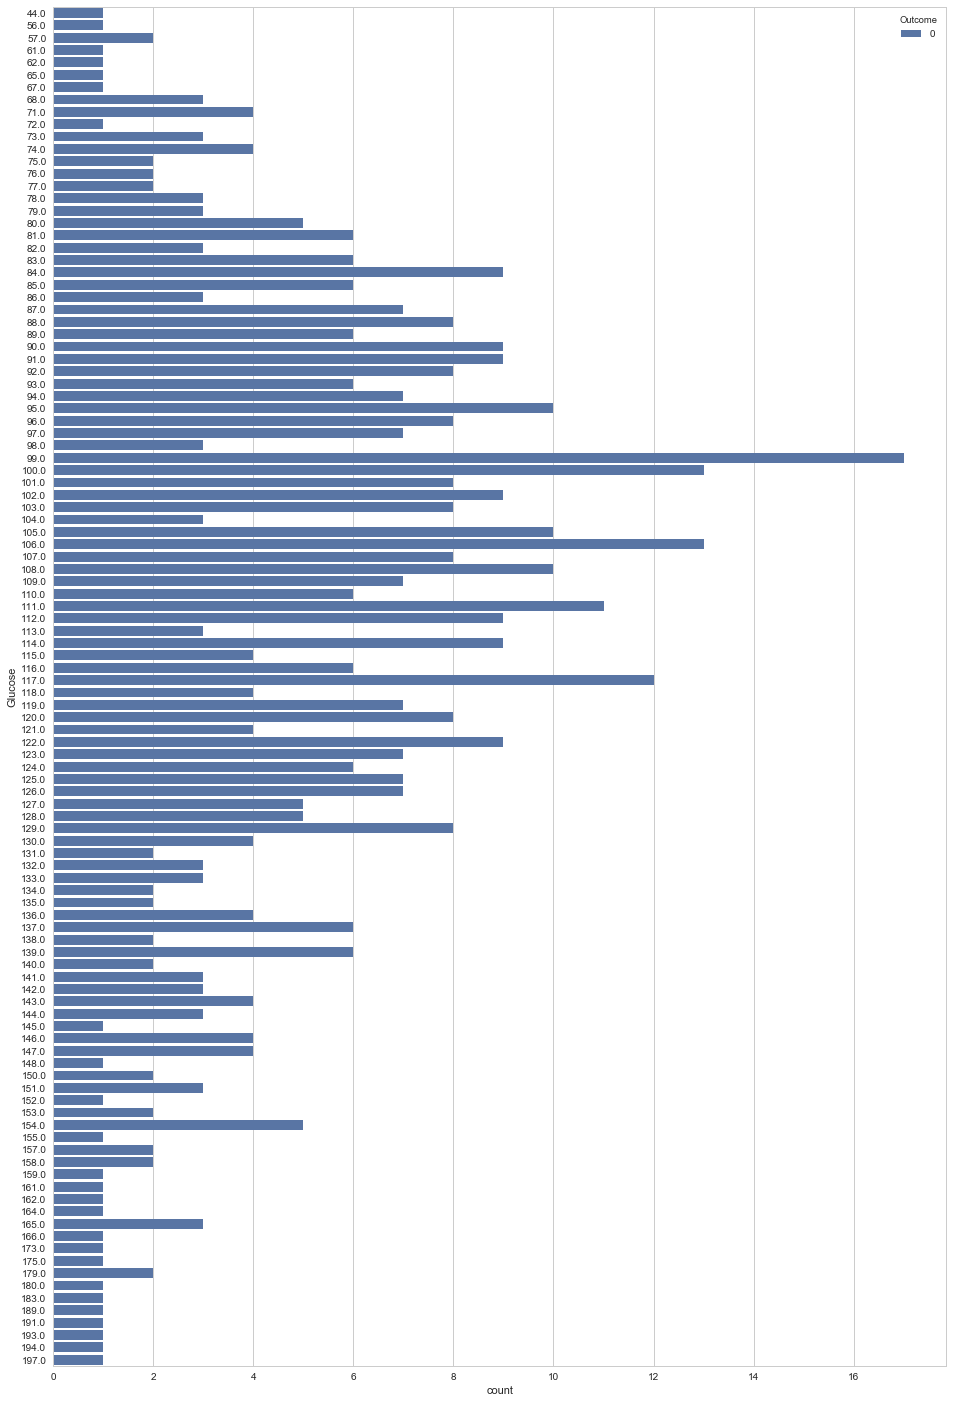

In [108]:
#Count of people with no diabetics (0)
plt.figure(figsize=(16, 25))
sns.set(style="whitegrid")
sns.countplot(y='Glucose', hue='Outcome',data=d_data[d_data['Outcome']==0])

The count of diabetics(1) patients are high when glucose level range between 97-180

The count of no diabetics(0) patients are high when glucose level range between 80-129
